The objective of the following article is to obtain a step-by-step guide on building the `ADIDA Model` using `ADIDA` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[ADIDA Model](#2)
3.	[Installing Statsforecast](#3)
4.	[Loading libraries and data](#4)
5.	[Explore Data with the plot method](#5)
6.	[Split the data into training and testing](#6)
7.	[Implementation of Theta with StatsForecast](#7)
8.	[Evaluate the model’s performance](#8)
9.	[Evaluate the model](#9)
10. [References](#10)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)

The Aggregate-Disaggregate Intermittent Demand Approach (ADIDA) is a forecasting method that is used to predict the demand for products that exhibit intermittent demand patterns. Intermittent demand patterns are characterized by a large number of zero observations, which can make forecasting challenging.

The ADIDA method uses temporal aggregation to reduce the number of zero observations and mitigate the effect of the variance observed in the intervals. The method uses equally sized time buckets to perform non-overlapping temporal aggregation and predict the demand over a pre-specified lead time. The time bucket is set equal to the mean inter-demand interval, which is the average time between two consecutive non-zero observations.

The method uses the Simple Exponential Smoothing (SES) technique to obtain the forecasts. SES is a popular time series forecasting technique that is commonly used for its simplicity and effectiveness in producing accurate forecasts.

The ADIDA method has several advantages. It is easy to implement and can be used for a wide range of intermittent demand patterns. The method also provides accurate forecasts and can be used to predict the demand over a pre-specified lead time.

However, the ADIDA method has some limitations. The method assumes that the time buckets are equally sized, which may not be the case for all intermittent demand patterns. Additionally, the method may not be suitable for time series data with complex patterns or trends.

Overall, the ADIDA method is a useful forecasting technique for intermittent demand patterns that can help mitigate the effect of zero observations and produce accurate demand forecasts.

# **2 ADIDA Model**
## **2.1 What is intermittent demand?**

Intermittent demand is a demand pattern characterized by the irregular and sporadic occurrence of events or sales. In other words, it refers to situations in which the demand for a product or service occurs intermittently, with periods of time in which there are no sales or significant events.

Intermittent demand differs from constant or regular demand, where sales occur in a predictable and consistent manner over time. In contrast, in intermittent demand, periods without sales may be long and there may not be a regular sequence of events.

This type of demand can occur in different industries and contexts, such as low consumption products, seasonal products, high variability products, products with short life cycles, or in situations where demand depends on specific events or external factors.

Intermittent demand can pose challenges in forecasting and inventory management, as it is difficult to predict when sales will occur and in what quantity. Methods like the Croston model, which I mentioned earlier, are used to address intermittent demand and generate more accurate and appropriate forecasts for this type of demand pattern.

## **2.2 Problem with intermittent demand**

Intermittent demand can present various challenges and issues in inventory management and demand forecasting. Some of the common problems associated with intermittent demand are as follows:

1. Unpredictable variability: Intermittent demand can have unpredictable variability, making planning and forecasting difficult. Demand patterns can be irregular and fluctuate dramatically between periods with sales and periods without sales.

2. Low frequency of sales: Intermittent demand is characterized by long periods without sales. This can lead to inventory management difficulties, as it is necessary to hold enough stock to meet demand when it occurs, while avoiding excess inventory during non-sales periods.

3. Forecast error: Forecasting intermittent demand can be more difficult to pin down than constant demand. Traditional forecast models may not be adequate to capture the variability and lack of patterns in intermittent demand, which can lead to significant errors in estimates of future demand.

4. Impact on the supply chain: Intermittent demand can affect the efficiency of the supply chain and create difficulties in production planning, supplier management and logistics. Lead times and inventory levels must be adjusted to meet unpredictable demand.

5. Operating costs: Managing inventory in situations of intermittent demand can increase operating costs. Maintaining adequate inventory during non-sales periods and managing stock levels may require additional investments in storage and logistics.

To address these issues, specific approaches to intermittent demand management are used, such as specialized forecasting models, product classification techniques, and tailored inventory strategies. These solutions seek to minimize the impacts of variability and lack of patterns in intermittent demand, optimizing inventory management and improving supply chain efficiency.

## **2.3 ADIDA Model**
The ADIDA model is based on the Simple Exponential Smoothing (SES) method and uses temporal aggregation to handle the problem of intermittent demand. The mathematical development of the model can be summarized as follows:

Let St be the demand at time $t$, where $t = 1, 2, ..., T$. The mean inter-demand interval is denoted as MI, which is the average time between two consecutive non-zero demands. The time bucket size is set equal to MI.

The demand data is then aggregated into non-overlapping time buckets of size MI. Let Bt be the demand in bucket $t$, where $t = 1, 2, ..., T/MI$. The aggregated demand data can be represented as:

$$B_t = \sum S_t, for (t-1)*MI + 1 ≤ j ≤ t*MI$$

The SES method is then applied to the aggregated demand data to obtain the forecasts. The forecast for bucket $t$ is denoted as $F_t$. The SES method involves estimating the level $L_t$ at time t based on the actual demand $D_t$ at time t and the estimated level at the previous time period, $L_{t-1}$, using the following equation:

$$L_t = \alpha * D_t + (1 - α) * L_{t-1}$$

where $\alpha$ is the smoothing parameter that controls the weight given to the current demand value.

The forecast for bucket $t$ is then obtained by using the estimated level at the previous time period, $L_{t-1}$, as follows:

$$F_t = L_{t-1}$$

The forecasts are then disaggregated to obtain the demand predictions for the original time period. Let $Y_t$ be the demand prediction at time $t$. The disaggregation can be performed using the following equation:

$$Y_t = F_t / MI, for (t-1)*MI + 1 ≤ j ≤ t*MI$$

## **2.4 How can you determine if the ADIDA model is suitable for a specific data set?**

To determine if the ADIDA model is suitable for a specific data set, the following steps can be followed:

1. Analyze the demand pattern: Examine the demand pattern of the data to determine if it fits an intermittent pattern. Intermittent data is characterized by a high proportion of zeros and sporadic demands in specific periods.

2. Evaluate seasonality: Check if there is a clear seasonality in the data. The ADIDA model assumes that there is no seasonality or that it can be handled by temporal aggregation. If the data show complex seasonality or cannot be handled by temporal aggregation, the ADIDA model may not be suitable.

3. Data requirements: Consider the data requirements of the ADIDA model. The model requires historical demand data and the ability to calculate the mean interval between non-zero demands. Make sure you have enough data to estimate the parameters and that the data is available at a frequency suitable for temporal aggregation.

4. Performance evaluation: Perform a performance evaluation of the ADIDA model on the specific data set. Compare model-generated forecasts with actual demand values and use evaluation metrics such as mean absolute error (MAE) or mean square error (MSE). If the model performs well and produces accurate forecasts on the data set, this is an indication that it is suitable for that data set.

5. Comparison with other models: Compare the performance of the ADIDA model with other forecast models suitable for intermittent data. Consider models like Croston, Syntetos-Boylan Approximation (SBA), or models based on exponential smoothing techniques that have been developed specifically for intermittent data. If the ADIDA model shows similar or better performance than other models, it can be considered suitable.

Remember that the adequacy of the ADIDA model may depend on the specific nature of the data and the context of the forecasting problem. It is advisable to carry out a thorough analysis and experiment with different models to determine the most appropriate approach for the data set in question.

# **3. Installing Statsforecast** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

* using pip:

`pip install statsforecast`

* using with conda:

`conda install -c conda-forge statsforecast`



¡Warning!

We are constantly updating StatsForecast, so we suggest fixing the version to avoid issues. 

`pip install statsforecast=="1.0.0"`

# **4. Loading libraries and data** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# Handling and processing of Data for Date (time)
# ==============================================================================
import datetime
import time
from datetime import datetime, timedelta

# 
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
import plotly.graph_objects as go
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/tipos_malarias_choco_colombia.csv", sep=";", usecols=[0,4])
df.head()

,semanas,malaria_falciparum
0,2007-12-31,50.0
1,2008-01-07,62.0
2,2008-01-14,76.0
3,2008-01-21,64.0
4,2008-01-28,38.0


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2007-12-31,50.0,1
1,2008-01-07,62.0,1
2,2008-01-14,76.0,1
3,2008-01-21,64.0,1
4,2008-01-28,38.0,1


In [11]:
df.tail()

,ds,y,unique_id
778,2022-11-28,226,1
779,2022-12-05,212,1
780,2022-12-12,151,1
781,2022-12-19,97,1
782,2022-12-26,42,1


In [6]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 782
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         783 non-null    datetime64[ns]
 1   y          783 non-null    int64         
 2   unique_id  783 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.5+ KB


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [8]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

In [9]:
df["y"] = df["y"].astype(float).astype("int64")

# **5. Explore Data with the plot method** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

In [12]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

## **5.1 Autocorrelation plots**

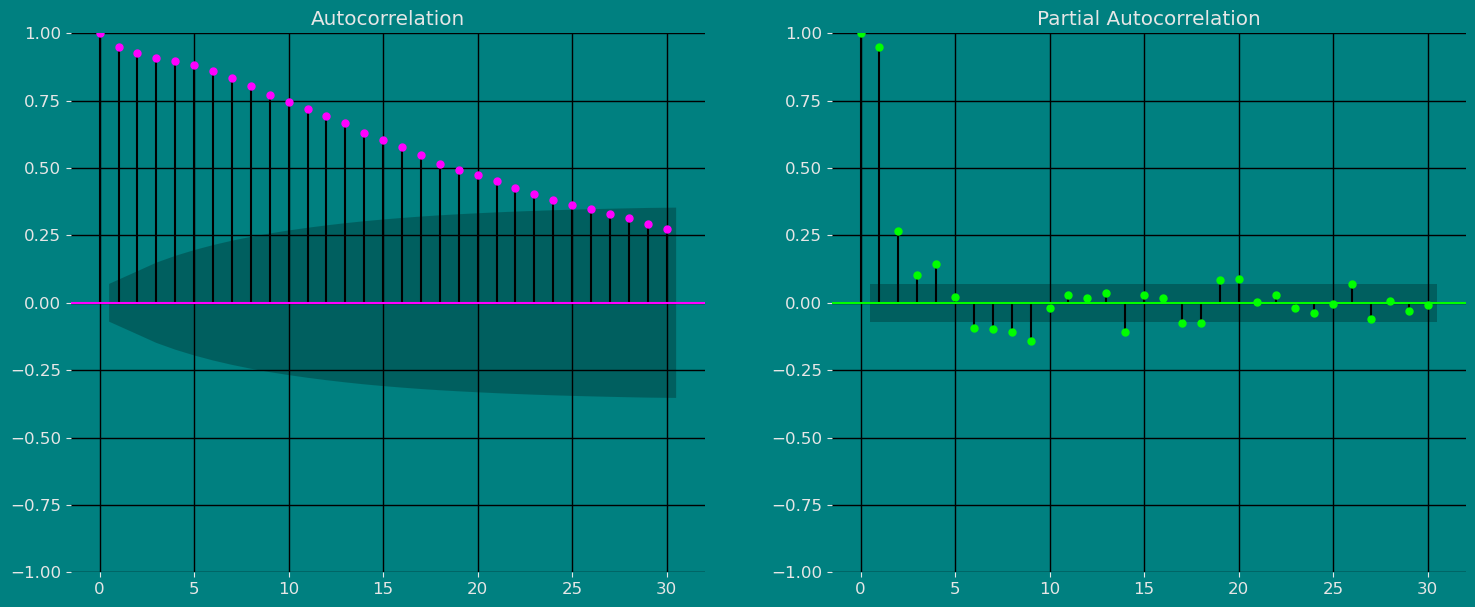

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

## **5.2 Decomposition of the time series**

How to decompose a time series and why?

In time series analysis to forecast new values, it is very important to know past data. More formally, we can say that it is very important to know the patterns that values follow over time. There can be many reasons that cause our forecast values to fall in the wrong direction. Basically, a time series consists of four components. The variation of those components causes the change in the pattern of the time series. These components are:

* **Level:** This is the primary value that averages over time.
* **Trend:** The trend is the value that causes increasing or decreasing patterns in a time series.
* **Seasonality:** This is a cyclical event that occurs in a time series for a short time and causes short-term increasing or decreasing patterns in a time series.
* **Residual/Noise:** These are the random variations in the time series.

Combining these components over time leads to the formation of a time series. Most time series consist of level and noise/residual and trend or seasonality are optional values.

If seasonality and trend are part of the time series, then there will be effects on the forecast value. As the pattern of the forecasted time series may be different from the previous time series.

The combination of the components in time series can be of two types:
* Additive
* multiplicative

### **Additive time series**

If the components of the time series are added to make the time series. Then the time series is called the additive time series. By visualization, we can say that the time series is additive if the increasing or decreasing pattern of the time series is similar throughout the series. The mathematical function of any additive time series can be represented by:
$$y(t) = level + Trend + seasonality + noise$$

### **Multiplicative time series**

If the components of the time series are multiplicative together, then the time series is called a multiplicative time series. For visualization, if the time series is having exponential growth or decline with time, then the time series can be considered as the multiplicative time series. The mathematical function of the multiplicative time series can be represented as.

$$y(t) = Level * Trend * seasonality * Noise$$

In [23]:
from plotly.subplots import make_subplots

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.tools as tls

def plotSeasonalDecompose(
    x,
    model='additive',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
    title="Seasonal Decomposition"):

    """
    Plot time series decomposition
    :param x: Time series.
    
    See documentation of the remaining models here - 
        https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
     
    Example - 
    import pandas as pd
    from datetime import datetime
    import PlotTimeSeries
    s = pd.DataFrame(list(range(1, 11))*10,
                    index=pd.date_range(start=datetime(2010,  1, 1), periods=100))
    fig = PlotTimeSeries.plotSeasonalDecompose(s)
    fig.show()
    """

    result = seasonal_decompose(
            x, model=model, filt=filt, period=period,
            two_sided=two_sided, extrapolate_trend=extrapolate_trend)
    fig = make_subplots(
            rows=4, cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"])
    
    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.observed, mode='lines'),
                row=1, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.trend.index, y=result.trend, mode='lines'),
                row=2, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines'),
                row=3, col=1,
            )

    fig.add_trace(
            go.Scatter(x=result.resid.index, y=result.resid, mode='lines'),
                row=4, col=1,
            )

    return fig

In [26]:
plotSeasonalDecompose(
    df["y"],
    model="additive",
    period=52,
    
    title="Seasonal Decomposition")

# **6. Split the data into training and testing** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `ADIDA Model`.
2. Data to test our model

For the test data we will use the last 25 week to test and evaluate the performance of our model.

In [32]:
train = df[df.ds<='2022-07-04'] 
test = df[df.ds>'2022-07-04'] 

In [33]:
train.shape, test.shape

((758, 3), (25, 3))

Now let's plot the training data and the test data.

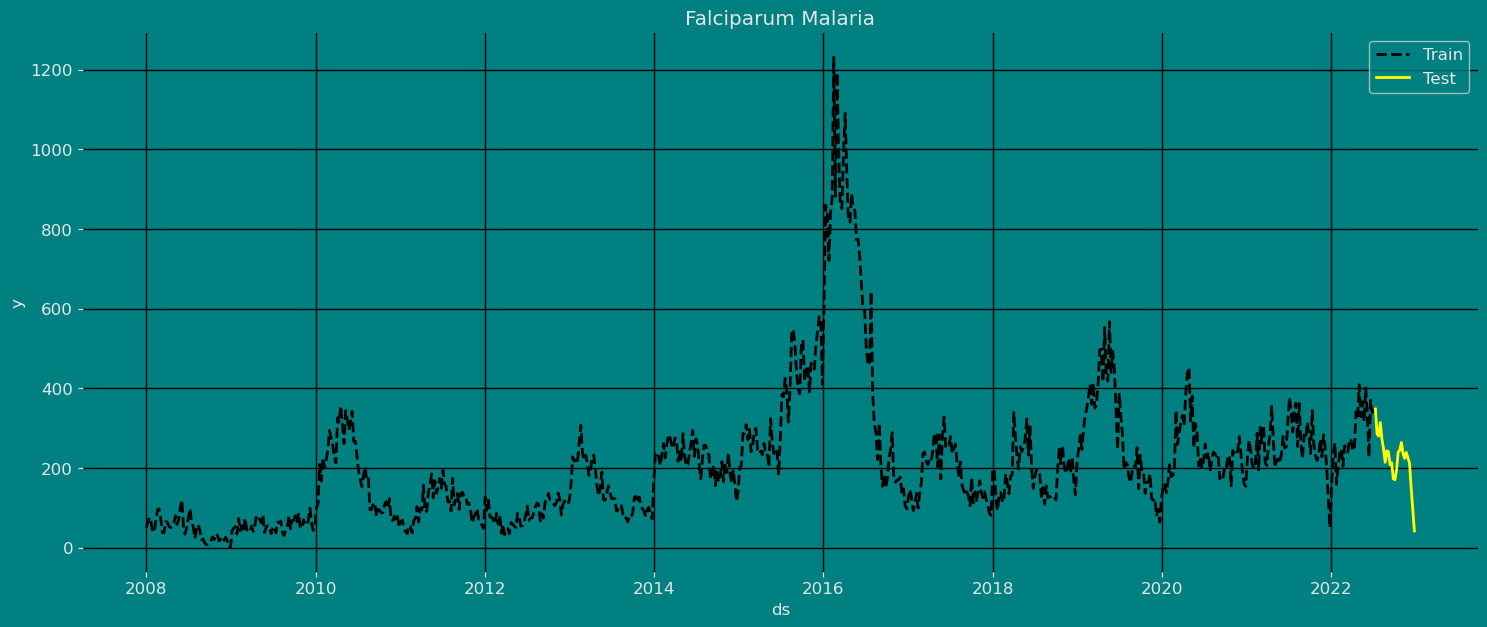

In [35]:
sns.lineplot(train,x="ds", y="y", label="Train", linestyle="--",linewidth=2)
sns.lineplot(test, x="ds", y="y", label="Test", linewidth=2, color="yellow")
plt.title("Falciparum Malaria");
plt.show()

# **7. Implementation of `ADIDA Model` with StatsForecast** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

To also know more about the parameters of the functions of the `ADIDA Model` you can see it [here](https://nixtla.github.io/statsforecast/src/core/models.html#adida).

## **7.1 Load libraries**

In [36]:
from statsforecast import StatsForecast
from statsforecast.models import ADIDA

In [37]:
?ADIDA

Init signature: ADIDA(alias: str = 'ADIDA')
Docstring:      <no docstring>
Init docstring:
ADIDA model.

Aggregate-Dissagregate Intermittent Demand Approach: Uses temporal aggregation to reduce the
number of zero observations. Once the data has been agregated, it uses the optimized SES to
generate the forecasts at the new level. It then breaks down the forecast to the original
level using equal weights.

ADIDA specializes on sparse or intermittent series are series with very few non-zero observations.
They are notoriously hard to forecast, and so, different methods have been developed
especifically for them.

**References:**<br>
[Nikolopoulos, K., Syntetos, A. A., Boylan, J. E., Petropoulos, F., & Assimakopoulos, V. (2011). An aggregate–disaggregate intermittent demand approach (ADIDA) to forecasting: an empirical proposition and analysis. Journal of the Operational Research Society, 62(3), 544-554.](https://researchportal.bath.ac.uk/en/publications/an-aggregate-disaggregate-intermitte

## **7.2 Building Model**
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/) by the master, Rob Hyndmann, can be useful for `season_length`.


In [39]:
season_length = 52 # Hourly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [ADIDA()]

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [40]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df=df,
                   models=models,
                   freq='W', 
                   n_jobs=-1)

## **7.3 Fit the Model**

In [41]:
# fit the models
sf.fit()

StatsForecast(models=[ADIDA])

Let's see the results of our `ADIDA Model`. We can observe it with the following instruction:

In [42]:
result=sf.fitted_[0,0].model_
result

{'mean': array([132.52887], dtype=float32)}

## **7.4 Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 25 week ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [43]:
# Prediction
Y_hat = sf.forecast(horizon )

Y_hat

,ds,ADIDA
unique_id,,
1,2023-01-01,132.52887
1,2023-01-08,132.52887
1,2023-01-15,132.52887
1,2023-01-22,132.52887
1,2023-01-29,132.52887
1,2023-02-05,132.52887
1,2023-02-12,132.52887
1,2023-02-19,132.52887
1,2023-02-26,132.52887


In [45]:
Y_hat=Y_hat.reset_index()
Y_hat

,unique_id,ds,ADIDA
0,1,2023-01-01,132.52887
1,1,2023-01-08,132.52887
2,1,2023-01-15,132.52887
3,1,2023-01-22,132.52887
4,1,2023-01-29,132.52887
5,1,2023-02-05,132.52887
6,1,2023-02-12,132.52887
7,1,2023-02-19,132.52887
8,1,2023-02-26,132.52887
9,1,2023-03-05,132.52887


In [47]:
# Merge the forecasts with the true values
#Y_hat1 = df.merge(Y_hat, how='left', on=['unique_id', 'ds'])
Y_hat1 = pd.concat([df,Y_hat],  keys=['unique_id', 'ds'])
Y_hat1

ds     y unique_id      ADIDA
unique_id 0  2007-12-31  50.0         1        NaN
          1  2008-01-07  62.0         1        NaN
          2  2008-01-14  76.0         1        NaN
          3  2008-01-21  64.0         1        NaN
          4  2008-01-28  38.0         1        NaN
...                 ...   ...       ...        ...
ds        20 2023-05-21   NaN         1  132.52887
          21 2023-05-28   NaN         1  132.52887
          22 2023-06-04   NaN         1  132.52887
          23 2023-06-11   NaN         1  132.52887
          24 2023-06-18   NaN         1  132.52887

[808 rows x 4 columns]

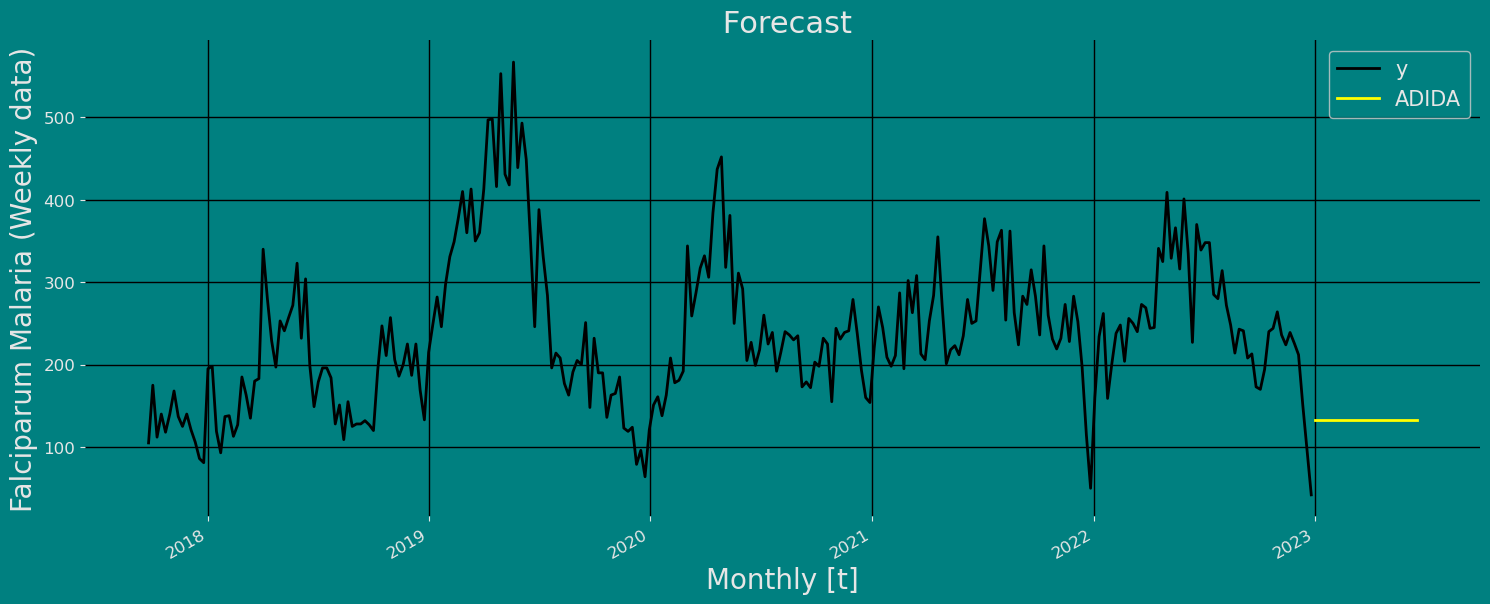

In [50]:
# Merge the forecasts with the true values

fig, ax = plt.subplots(1, 1)
plot_df = pd.concat([df, Y_hat1]).set_index('ds').tail(300)
plot_df['y'].plot(ax=ax, linewidth=2)
plot_df[ "ADIDA"].plot(ax=ax, linewidth=2, color="yellow")
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Falciparum Malaria (Weekly data)', fontsize=20)
ax.set_xlabel('Monthly [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid(True)

## **7.5 Predict method with confidence interval**

To generate forecasts use the predict method.

The predict method takes two arguments: forecasts the next `h` (for horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 25 week ahead.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals.

This step should take less than 1 second.

In [54]:
forecast_df = sf.predict(h=horizon) 

forecast_df

,ds,ADIDA
unique_id,,
1,2023-01-01,132.52887
1,2023-01-08,132.52887
1,2023-01-15,132.52887
1,2023-01-22,132.52887
1,2023-01-29,132.52887
1,2023-02-05,132.52887
1,2023-02-12,132.52887
1,2023-02-19,132.52887
1,2023-02-26,132.52887


We can join the forecast result with the historical data using the pandas function `pd.concat()`, and then be able to use this result for graphing.

In [55]:
pd.concat([df, forecast_df]).set_index('ds')

,y,unique_id,ADIDA
ds,,,
2007-12-31,50.0,1,NaN
2008-01-07,62.0,1,NaN
2008-01-14,76.0,1,NaN
2008-01-21,64.0,1,NaN
2008-01-28,38.0,1,NaN
...,...,...,...
2023-05-21,NaN,NaN,132.52887
2023-05-28,NaN,NaN,132.52887
2023-06-04,NaN,NaN,132.52887


In [86]:
df_plot= pd.concat([df, forecast_df]).set_index('ds').tail(200)
df_plot

,y,unique_id,ADIDA
ds,,,
2019-08-26,191.0,1,NaN
2019-09-02,205.0,1,NaN
2019-09-09,200.0,1,NaN
2019-09-16,251.0,1,NaN
2019-09-23,148.0,1,NaN
...,...,...,...
2023-05-21,NaN,NaN,132.52887
2023-05-28,NaN,NaN,132.52887
2023-06-04,NaN,NaN,132.52887


Now let's visualize the result of our forecast and the historical data of our time series.

Text(0, 0.5, '')

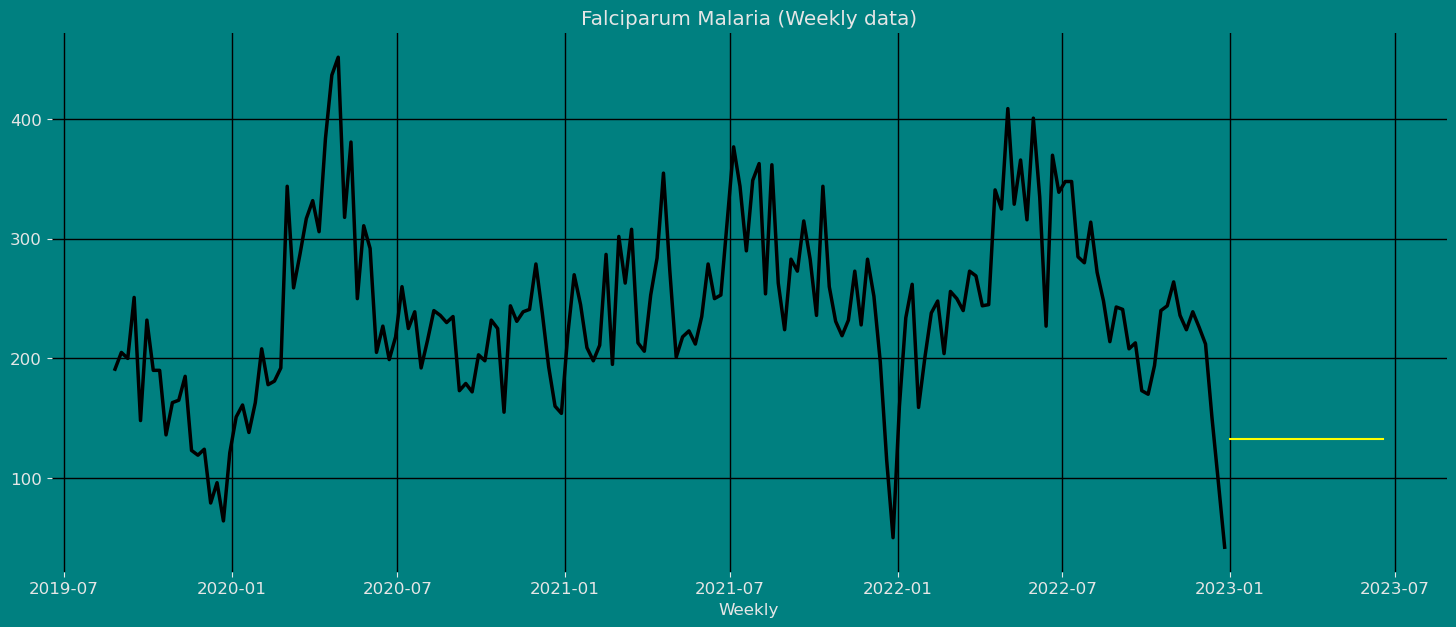

In [90]:
plt.plot(df_plot['y'],label="Actual", linewidth=2.5)
plt.plot(df_plot['ADIDA'], label="ADIDA", color="yellow") # '-', '--', '-.', ':',

plt.title("Falciparum Malaria (Weekly data)");
plt.xlabel("Weekly")
plt.ylabel("")

Let's plot the same graph using the plot function that comes in `Statsforecast`, as shown below.

In [59]:
sf.plot(df, forecast_df)

# **8. Evaluate the model’s performance** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In previous steps, we’ve taken our historical data to predict the future. However, to asses its accuracy we would also like to know how the model would have performed in the past. To assess the accuracy and robustness of your models on your data perform Cross-Validation.

With time series data, Cross Validation is done by defining a sliding window across the historical data and predicting the period following it. This form of cross-validation allows us to arrive at a better estimation of our model’s predictive abilities across a wider range of temporal instances while also keeping the data in the training set contiguous as is required by our models.

The following graph depicts such a Cross Validation Strategy:

![](https://raw.githubusercontent.com/Nixtla/statsforecast/main/nbs/imgs/ChainedWindows.gif)

## **8.1 Perform time series cross-validation**

Cross-validation of time series models is considered a best practice but most implementations are very slow. The statsforecast library implements cross-validation as a distributed operation, making the process less time-consuming to perform. If you have big datasets you can also perform Cross Validation in a distributed cluster using Ray, Dask or Spark.

In this case, we want to evaluate the performance of each model for the last 5 months `(n_windows=)`, forecasting every second months `(step_size=12)`. Depending on your computer, this step should take around 1 min.

The cross_validation method from the StatsForecast class takes the following arguments.

* `df:` training data frame

* `h (int):` represents h steps into the future that are being forecasted. In this case, 12 months ahead.

* `step_size (int):` step size between each window. In other words: how often do you want to run the forecasting processes.

* `n_windows(int):` number of windows used for cross validation. In other words: what number of forecasting processes in the past do you want to evaluate.

In [62]:
crossvalidation_df = sf.cross_validation(df=df,
                                         h=horizon,
                                         step_size=30,
                                         n_windows=5)

The crossvaldation_df object is a new data frame that includes the following columns:

* `unique_id:` index. If you dont like working with index just run `crossvalidation_df.resetindex()`.
* `ds:` datestamp or temporal index
* `cutoff:` the last datestamp or temporal index for the `n_windows`.
* `y:` true value
* `model:` columns with the model’s name and fitted value.

In [63]:
crossvalidation_df

,ds,cutoff,y,ADIDA
unique_id,,,,
1,2020-03-22,2020-03-15,317.0,251.901505
1,2020-03-29,2020-03-15,332.0,251.901505
1,2020-04-05,2020-03-15,306.0,251.901505
1,2020-04-12,2020-03-15,384.0,251.901505
1,2020-04-19,2020-03-15,437.0,251.901505
...,...,...,...,...
1,2022-11-27,2022-07-03,226.0,336.747375
1,2022-12-04,2022-07-03,212.0,336.747375
1,2022-12-11,2022-07-03,151.0,336.747375


We’ll now plot the forecast for each cutoff period. To make the plots clearer, we’ll rename the actual values in each period.

In [64]:
cross_validation=crossvalidation_df.copy()
cross_validation.rename(columns = {'y' : 'actual'}, inplace = True) # rename actual values 

cutoff = cross_validation['cutoff'].unique()

for k in range(len(cutoff)): 
    cv = cross_validation[cross_validation['cutoff'] == cutoff[k]]
    StatsForecast.plot(df, cv.loc[:, cv.columns != 'cutoff'])

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

We can now compute the accuracy of the forecast using an appropiate accuracy metric. Here we’ll use the Root Mean Squared Error (RMSE). To do this, we first need to `install datasetsforecast`, a Python library developed **by Nixtla** that includes a function to compute the RMSE.

`pip install datasetsforecast`

In [65]:
from datasetsforecast.losses import rmse

The function to compute the RMSE takes two arguments:

1. The actual values.
2. The forecasts, in this case, `ADIDA Model`.

In [67]:
rmse = rmse(cross_validation['actual'], cross_validation["ADIDA"])
print("RMSE using cross-validation: ", rmse)

RMSE using cross-validation:  84.45186


# **10. References** <a class="anchor" id="10"></a>

[Table of Contents](#0)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#arch-model).
5. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
7. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).